In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
for i in range(1, 10):
    if i<4:
        k = 0.2
    elif i<7:
        k = 0.4
    else:
        k = 0.7
    if i in [1, 4, 7]:
        name = f"exp{i}_{k}_50.csv"
    elif i in [2, 5, 8]:
        name = f"exp{i}_{k}_100.csv"
    else:
        name = f"exp{i}_{k}_200.csv"

    pred_filename = 'pred_'+name
    gt_filename = 'gt_'+name
    var_filename = 'var_'+name

    df_gt = pd.read_csv(gt_filename)
    df_pred = pd.read_csv(pred_filename)
    df_var = pd.read_csv(var_filename)

    rmse = 0
    mae = 0
    rmse_un = 0
    mae_un = 0
    for j in range(len(df_pred)):
        rmse += (df_gt.loc[j, 'dish washer'] - df_pred.loc[j, 'dish washer'])**2
        mae += abs(df_gt.loc[j, 'dish washer'] - df_pred.loc[j, 'dish washer'])
        mae_un += df_var['0'][j]
        rmse_un += 2*(df_var['0'][j]/(df_pred.loc[j, 'dish washer']+0.001))
    
    rmse /= len(df_pred)
    rmse = rmse**0.5

    rmse_un = rmse*(rmse_un)**0.5*(1/len(df_pred))

    mae /= len(df_pred)
    mae_un /= len(df_pred)

    print(f"Experiment Number {i} RMSE: {round(rmse,2)}")
    print(f"Experiment Number {i} RMSE Uncertainity: {round(rmse_un, 3)}")
    print(f"Experiment Number {i} MAE: {round(mae,2)}")
    print(f"Experiment Number {i} MAE Uncertainity: {round(mae_un, 3)}")

Experiment Number 1 RMSE: 57.6
Experiment Number 1 RMSE Uncertainity: 0.098
Experiment Number 1 MAE: 7.68
Experiment Number 1 MAE Uncertainity: 0.195
Experiment Number 2 RMSE: 57.61
Experiment Number 2 RMSE Uncertainity: 0.106
Experiment Number 2 MAE: 7.68
Experiment Number 2 MAE Uncertainity: 0.203
Experiment Number 3 RMSE: 57.58
Experiment Number 3 RMSE Uncertainity: 0.115
Experiment Number 3 MAE: 7.68
Experiment Number 3 MAE Uncertainity: 0.203
Experiment Number 4 RMSE: 58.13
Experiment Number 4 RMSE Uncertainity: 0.221
Experiment Number 4 MAE: 7.9
Experiment Number 4 MAE Uncertainity: 0.454
Experiment Number 5 RMSE: 60.58
Experiment Number 5 RMSE Uncertainity: 0.108
Experiment Number 5 MAE: 8.3
Experiment Number 5 MAE Uncertainity: 0.234
Experiment Number 6 RMSE: 60.58
Experiment Number 6 RMSE Uncertainity: 0.113
Experiment Number 6 MAE: 8.29
Experiment Number 6 MAE Uncertainity: 0.236
Experiment Number 7 RMSE: 61.76
Experiment Number 7 RMSE Uncertainity: 0.348
Experiment Number 7 

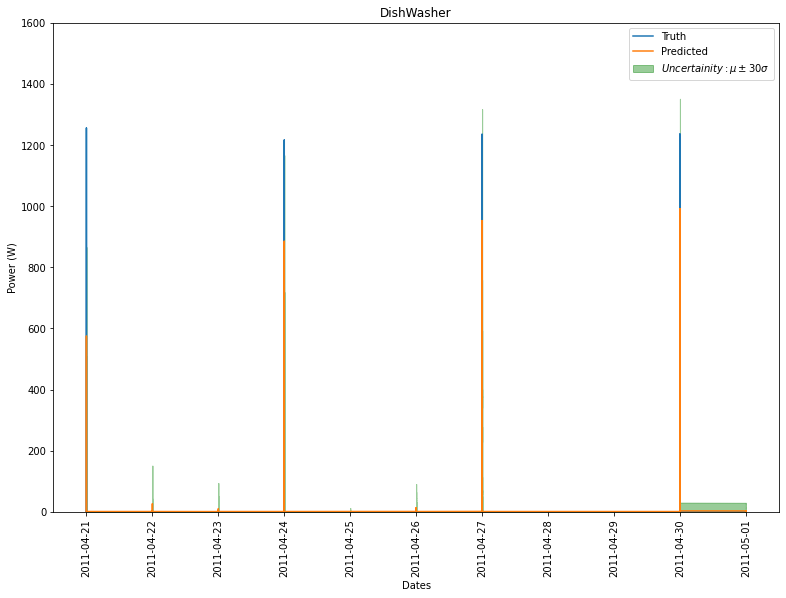

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp1_0.2_50.csv')
df_pred = pd.read_csv('pred_exp1_0.2_50.csv')
df_var = pd.read_csv('var_exp1_0.2_50.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1600)
plt.legend(loc = 'best')
plt.savefig('plt_exp1_0.2_50.pdf', bbox_inches = 'tight')
plt.show()

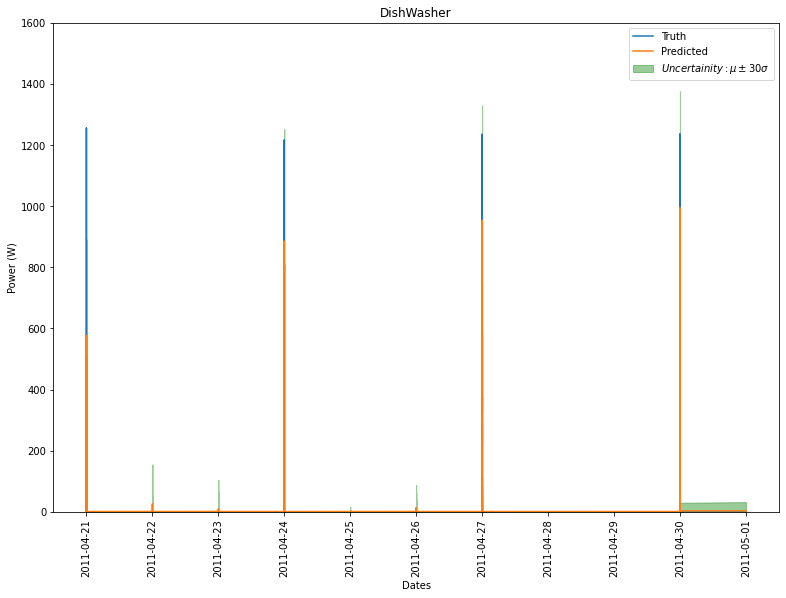

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp2_0.2_100.csv')
df_pred = pd.read_csv('pred_exp2_0.2_100.csv')
df_var = pd.read_csv('var_exp2_0.2_100.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1600)
plt.legend(loc = 'best')
plt.savefig('plt_exp2_0.2_100.pdf', bbox_inches = 'tight')
plt.show()

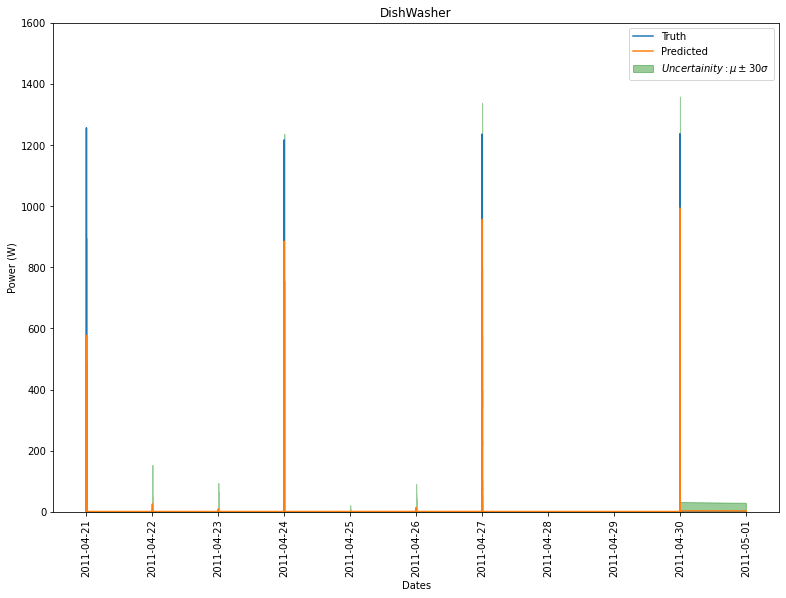

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp3_0.2_200.csv')
df_pred = pd.read_csv('pred_exp3_0.2_200.csv')
df_var = pd.read_csv('var_exp3_0.2_200.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1600)
plt.legend(loc = 'best')
plt.savefig('plt_exp3_0.2_200.pdf', bbox_inches = 'tight')
plt.show()

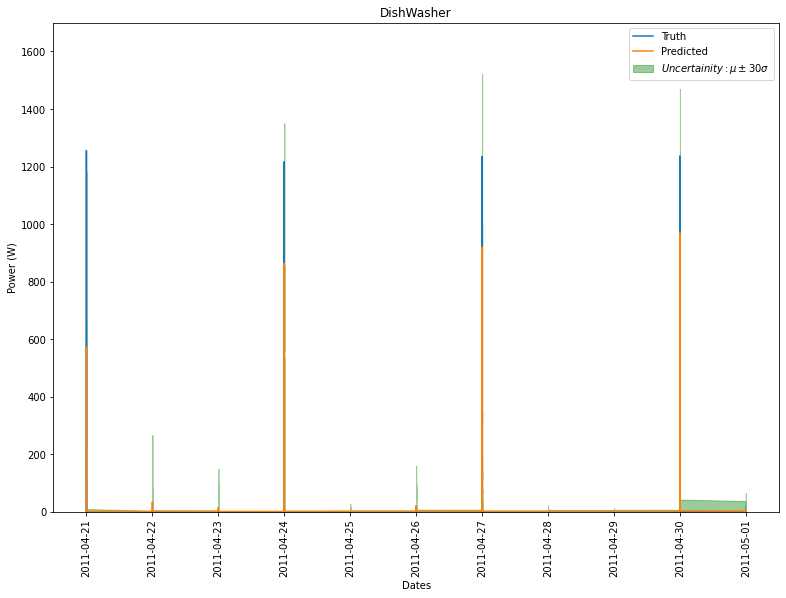

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp4_0.4_50.csv')
df_pred = pd.read_csv('pred_exp4_0.4_50.csv')
df_var = pd.read_csv('var_exp4_0.4_50.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1700)
plt.legend(loc = 'best')
plt.savefig('plt_exp4_0.4_50.pdf', bbox_inches = 'tight')
plt.show()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


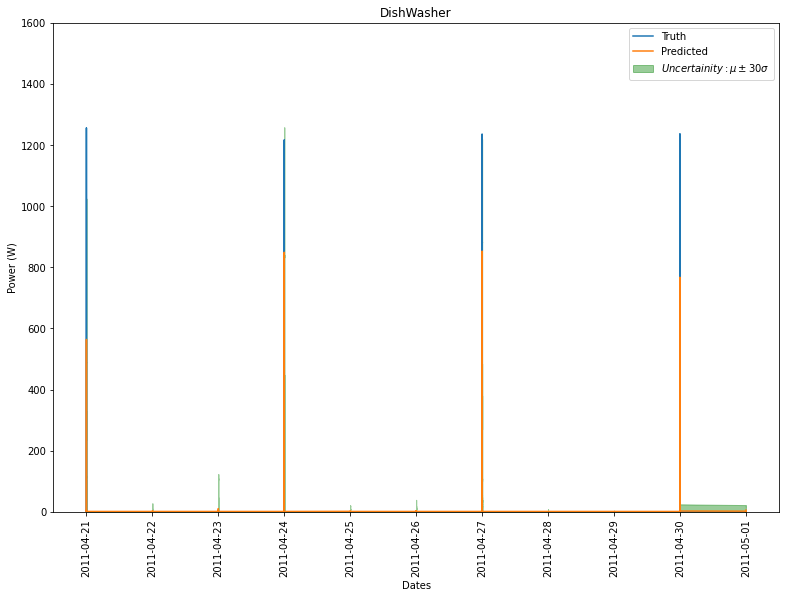

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp5_0.4_100.csv')
df_pred = pd.read_csv('pred_exp5_0.4_100.csv')
df_var = pd.read_csv('var_exp5_0.4_100.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1600)
plt.legend(loc = 'best')
plt.savefig('plt_exp5_0.4_100.pdf', bbox_inches = 'tight')
plt.show()

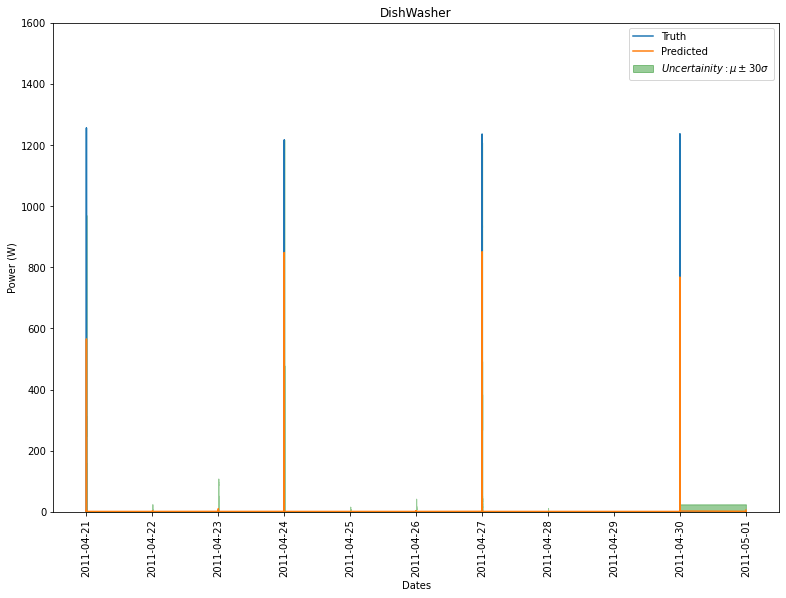

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp6_0.4_200.csv')
df_pred = pd.read_csv('pred_exp6_0.4_200.csv')
df_var = pd.read_csv('var_exp6_0.4_200.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1600)
plt.legend(loc = 'best')
plt.savefig('plt_exp6_0.4_200.pdf', bbox_inches = 'tight')
plt.show()

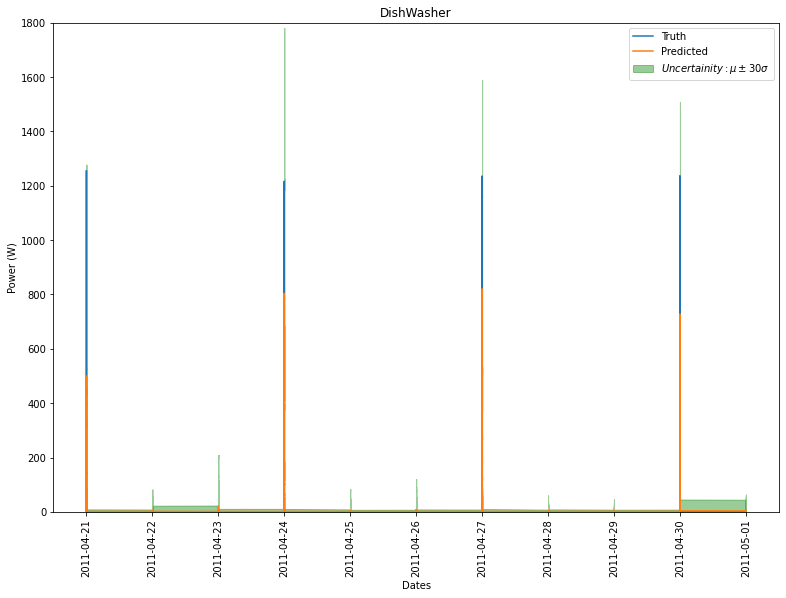

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp7_0.7_50.csv')
df_pred = pd.read_csv('pred_exp7_0.7_50.csv')
df_var = pd.read_csv('var_exp7_0.7_50.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1800)
plt.legend(loc = 'best')
plt.savefig('plt_exp7_0.7_50.pdf', bbox_inches = 'tight')
plt.show()

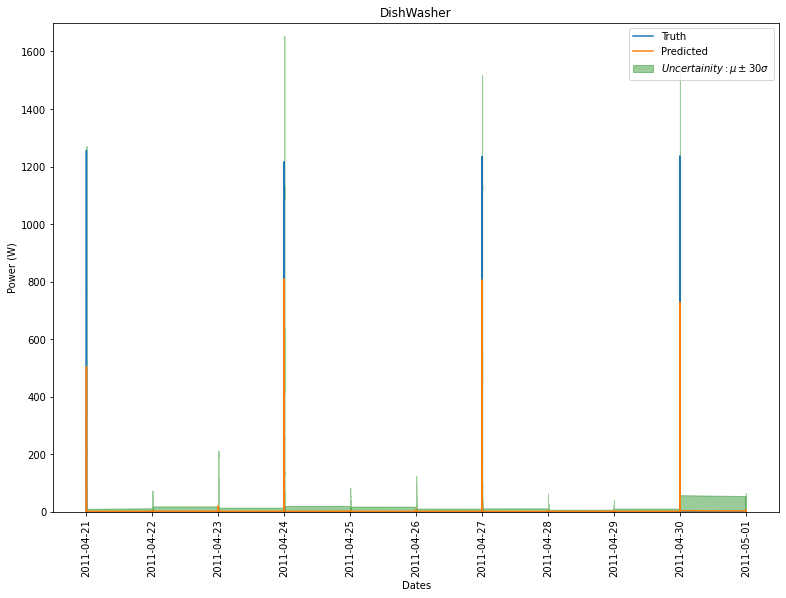

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp8_0.7_100.csv')
df_pred = pd.read_csv('pred_exp8_0.7_100.csv')
df_var = pd.read_csv('var_exp8_0.7_100.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1700)
plt.legend(loc = 'best')
plt.savefig('plt_exp8_0.7_100.pdf', bbox_inches = 'tight')
plt.show()

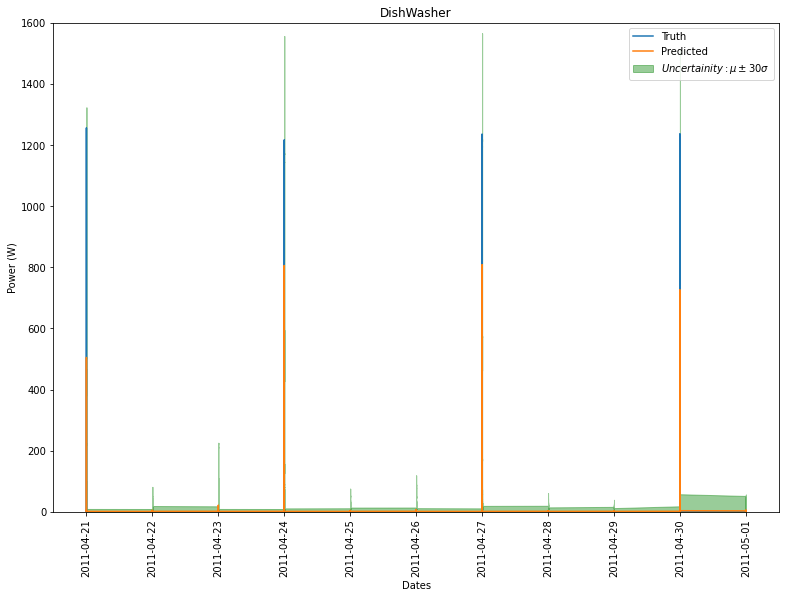

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_gt = pd.read_csv('gt_exp9_0.7_200.csv')
df_pred = pd.read_csv('pred_exp9_0.7_200.csv')
df_var = pd.read_csv('var_exp9_0.7_200.csv')

date = []
for i in range(len(df_gt)):
    date.append(df_gt['Unnamed: 0'][i][:10])
plt.figure(figsize=(13,9))
plt.plot(date, df_gt['dish washer'], label = 'Truth')
plt.plot(date, df_pred['dish washer'], label = 'Predicted')
plt.fill_between( date,
        df_pred['dish washer'] - df_var['0'] * ((30+1.)),
        df_pred['dish washer'] + df_var['0'] * ((30+1.)),
        color="g",
        alpha=0.4, label = r'$Uncertainity: \mu \pm 30\sigma$')
plt.title("DishWasher")
plt.ylabel("Power (W)")
plt.xlabel("Dates")
plt.xticks(rotation=90)
plt.ylim(0, 1600)
plt.legend(loc = 'best')
plt.savefig('plt_exp9_0.7_200.pdf', bbox_inches = 'tight')
plt.show()